# Customer Churn Analysis

A comprehensive analysis of telecommunications customer churn patterns using Python and data visualization.

## Project Overview

This notebook analyzes a telecommunications customer dataset to understand churn patterns and identify key factors that influence customer retention. The analysis covers:

- **Demographics**: Gender, Senior Citizen status, Partner, Dependents
- **Services**: Internet Service, Streaming TV/Movies, Phone Service  
- **Account Info**: Contract type, Payment method, Monthly charges, Tenure
- **Billing**: Paperless billing, Total charges

**Dataset**: 7,043 customer records with 20 features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## 1. Setup and Data Loading

First, we'll import the necessary libraries and set up our environment for analysis and visualization.

In [2]:
Path('figures').mkdir(exist_ok=True)
def savefig(filename):
    plt.savefig(Path('figures') / filename, bbox_inches='tight')

In [3]:
df = pd.read_csv('Customer-Churn.csv')

## 2. Data Exploration

Let's start by examining our dataset structure and understanding the data we're working with.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['seniorcitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

## 3. Data Preprocessing

We'll clean and prepare our data for analysis, including converting categorical variables for better readability.

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn Rate: 26.54%


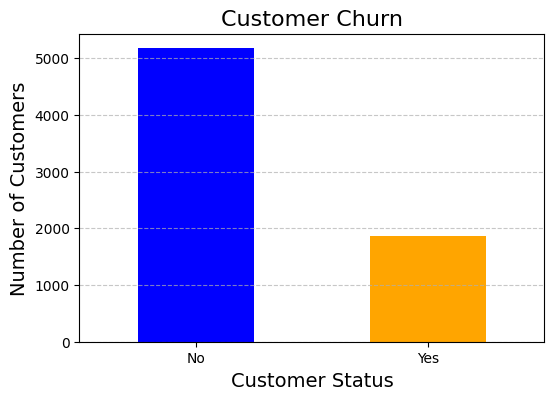

In [7]:
churned = df['Churn'].value_counts()
print(churned)
churn_rate = np.round((churned['Yes'] / churned.sum()) * 100, 2)
print(f'Churn Rate: {churn_rate}%')

plt.figure(figsize=(6,4))
churned.plot(kind='bar', color=['blue', 'orange'])
plt.title('Customer Churn', fontsize=16)
plt.xlabel('Customer Status', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churned_bar_chart.png')

plt.show()

## 4. Overall Churn Analysis

Let's start by understanding the overall churn rate in our dataset.

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Churn Rate: Female
  No: 73.08%
  Yes: 26.92%
Churn Rate: Male
  No: 73.84%
  Yes: 26.16%


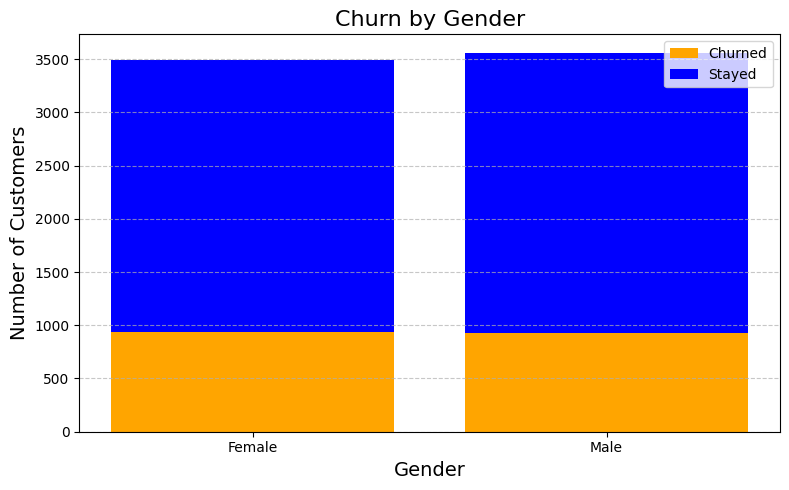

In [8]:
gender_churn = df.groupby('gender')['Churn'].value_counts().unstack()
print(gender_churn)
gender_churn_rate = np.round(gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100, 2)
for gender in gender_churn_rate.index:
    print(f'Churn Rate: {gender}')
    for col in gender_churn_rate.columns:
        print(f'  {col}: {gender_churn_rate.loc[gender, col]}%')

plt.figure(figsize=(8,5))
plt.bar(gender_churn.index, gender_churn['Yes'], color='orange', label='Churned')
plt.bar(gender_churn.index, gender_churn['No'], bottom=gender_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
savefig('churn_by_gender.png')

plt.show()


## 5. Demographic Analysis

Now let's analyze churn patterns across different demographic segments to understand which customer groups are more likely to churn.

### 5.1 Churn by Gender

Churn            No   Yes
seniorcitizen            
No             4508  1393
Yes             666   476
Churn Rate for Senior Citizens: 41.68%


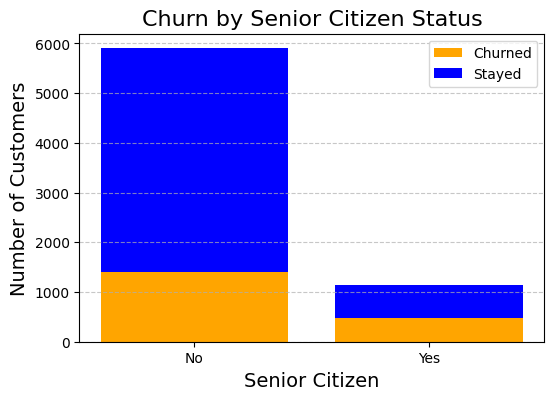

In [9]:
senior_churn = df.groupby('seniorcitizen')['Churn'].value_counts().unstack()
print(senior_churn)
senior_churn_rate = np.round((senior_churn['Yes'] / senior_churn.sum(axis=1)) * 100, 2)
print(f'Churn Rate for Senior Citizens: {senior_churn_rate["Yes"]}%')

plt.figure(figsize=(6,4))
plt.bar(senior_churn.index, senior_churn['Yes'], color='orange', label='Churned')
plt.bar(senior_churn.index, senior_churn['No'], bottom=senior_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Senior Citizen Status', fontsize=16)
plt.xlabel('Senior Citizen', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_senior_status.png')

plt.show()

### 5.2 Churn by Senior Citizen Status

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
Churn Rate for Customers with Partners: 19.66%


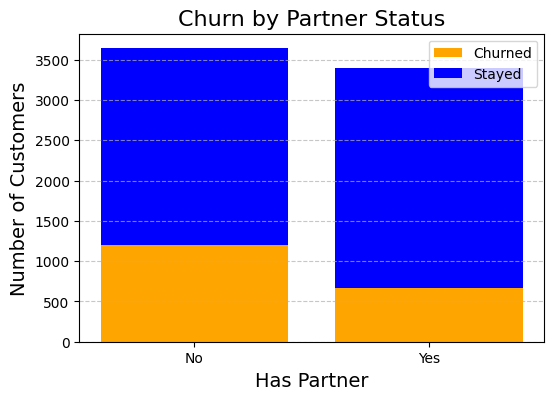

In [10]:
partner_churn = df.groupby('Partner')['Churn'].value_counts().unstack()
print(partner_churn)
partner_churn_rate = np.round((partner_churn['Yes'] / partner_churn.sum(axis=1)) * 100, 2)
print(f'Churn Rate for Customers with Partners: {partner_churn_rate["Yes"]}%')

plt.figure(figsize=(6,4))
plt.bar(partner_churn.index, partner_churn['Yes'], color='orange', label='Churned')
plt.bar(partner_churn.index, partner_churn['No'], bottom=partner_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Partner Status', fontsize=16)
plt.xlabel('Has Partner', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_partner_status.png')

plt.show()

### 5.3 Churn by Partner Status

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
Churn Rate for Customers with Dependents: 15.45%


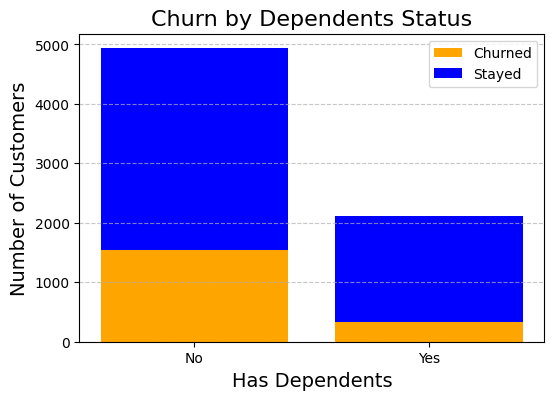

In [11]:
dependent_churn = df.groupby('Dependents')['Churn'].value_counts().unstack()
print(dependent_churn)
dependent_churn_rate = np.round((dependent_churn['Yes'] / dependent_churn.sum(axis=1)) * 100, 2)
print(f'Churn Rate for Customers with Dependents: {dependent_churn_rate["Yes"]}%')

plt.figure(figsize=(6,4))
plt.bar(dependent_churn.index, dependent_churn['Yes'], color='orange', label='Churned')
plt.bar(dependent_churn.index, dependent_churn['No'], bottom=dependent_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Dependents Status', fontsize=16)
plt.xlabel('Has Dependents', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_dependents_status.png')

plt.show()

### 5.4 Churn by Dependents Status

Churn               No   Yes
charge_tier                 
Low ($0-50)       1938   361
Medium ($50-100)  2587  1255
High ($100+)       649   253
Churn Rate for Low ($0-50): 15.7%
Churn Rate for Medium ($50-100): 32.67%
Churn Rate for High ($100+): 28.05%


/var/folders/_1/_qs6rq1s5l5c7t2_v39s6scw0000gn/T/ipykernel_6944/1330951147.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charge_churn = df.groupby('charge_tier')['Churn'].value_counts().unstack()


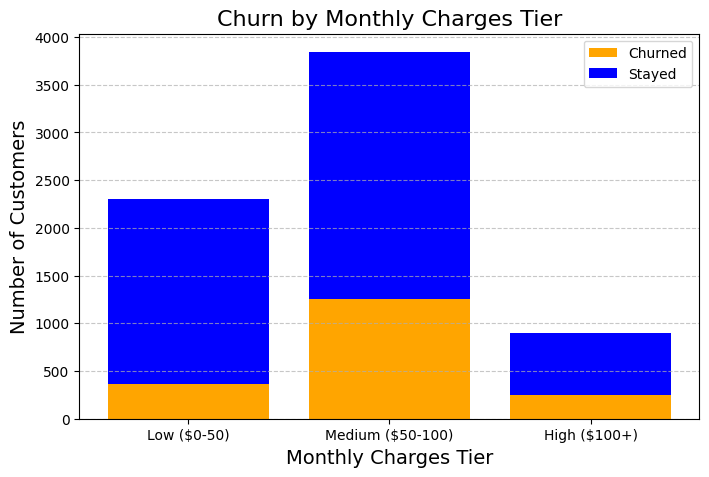

In [12]:
df['charge_tier'] = pd.cut(df['MonthlyCharges'], 
                          bins=[0, 50, 100, float('inf')], 
                          labels=['Low ($0-50)', 'Medium ($50-100)', 'High ($100+)'])
charge_churn = df.groupby('charge_tier')['Churn'].value_counts().unstack()
print(charge_churn)
charge_churn_rate = np.round((charge_churn['Yes'] / charge_churn.sum(axis=1)) * 100, 2)
for tier in charge_churn_rate.index:
    print(f'Churn Rate for {tier}: {charge_churn_rate[tier]}%')

plt.figure(figsize=(8,5))
plt.bar(charge_churn.index, charge_churn['Yes'], color='orange', label='Churned')
plt.bar(charge_churn.index, charge_churn['No'], bottom=charge_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Monthly Charges Tier', fontsize=16)
plt.xlabel('Monthly Charges Tier', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_charge_tier.png')

plt.show()

## 6. Financial Analysis

Let's examine how pricing affects customer churn by categorizing customers into different charge tiers.

### 6.1 Churn by Monthly Charges Tiers

We'll segment customers into three tiers based on their monthly charges:
- **Low**: $0-50
- **Medium**: $50-100  
- **High**: $100+

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Churn Rate for Bank transfer (automatic): 16.71%
Churn Rate for Credit card (automatic): 15.24%
Churn Rate for Electronic check: 45.29%
Churn Rate for Mailed check: 19.11%


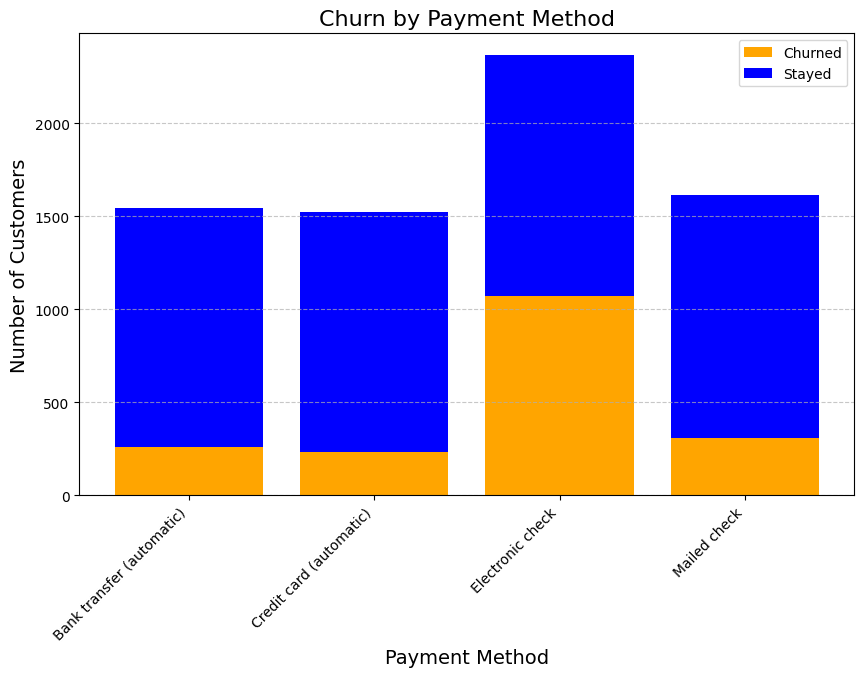

In [13]:
payment_method_churn = df.groupby('PaymentMethod')['Churn'].value_counts().unstack()
print(payment_method_churn)
payment_method_churn_rate = np.round((payment_method_churn['Yes'] / payment_method_churn.sum(axis=1)) * 100, 2)
for method in payment_method_churn_rate.index:
    print(f'Churn Rate for {method}: {payment_method_churn_rate[method]}%')

plt.figure(figsize=(10,6))
plt.bar(payment_method_churn.index, payment_method_churn['Yes'], color='orange', label='Churned')
plt.bar(payment_method_churn.index, payment_method_churn['No'], bottom=payment_method_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_payment_method.png')

plt.show()

### 6.2 Churn by Payment Method

Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400
Churn Rate for Paperless Billing = No: 16.33%
Churn Rate for Paperless Billing = Yes: 33.57%


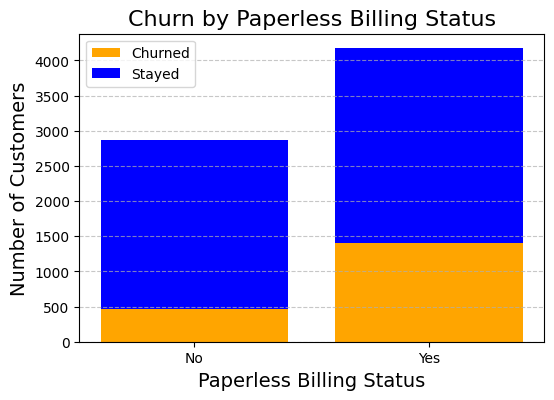

In [16]:
paperless_churn = df.groupby('PaperlessBilling')['Churn'].value_counts().unstack()
print(paperless_churn)
paperless_churn_rate = np.round((paperless_churn['Yes'] / paperless_churn.sum(axis=1)) * 100, 2)
for status in paperless_churn_rate.index:
    print(f'Churn Rate for Paperless Billing = {status}: {paperless_churn_rate[status]}%')

plt.figure(figsize=(6,4))
plt.bar(paperless_churn.index, paperless_churn['Yes'], color='orange', label='Churned')
plt.bar(paperless_churn.index, paperless_churn['No'], bottom=paperless_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Paperless Billing Status', fontsize=16)
plt.xlabel('Paperless Billing Status', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_paperless_billing.png')

plt.show()

### 6.3 Churn by Paperless Billing

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
Churn Rate for Month-to-month Contract: 42.71%
Churn Rate for One year Contract: 11.27%
Churn Rate for Two year Contract: 2.83%


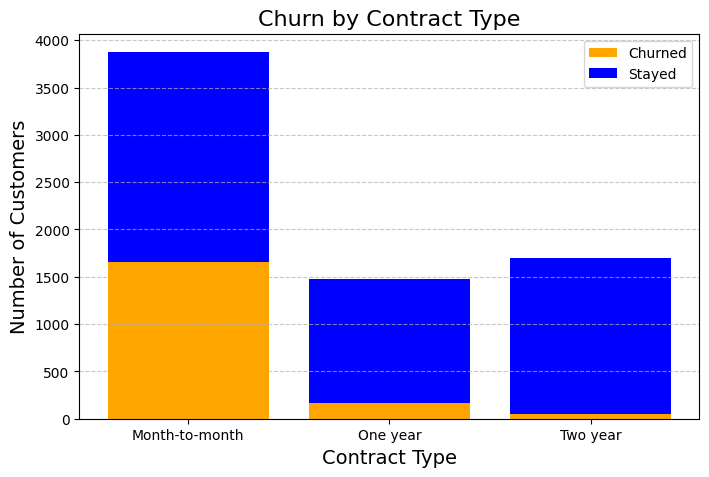

In [14]:
contract_churn = df.groupby('Contract')['Churn'].value_counts().unstack()
print(contract_churn)
contract_churn_rate = np.round((contract_churn['Yes'] / contract_churn.sum(axis=1)) * 100, 2)
for contract in contract_churn_rate.index:
    print(f'Churn Rate for {contract} Contract: {contract_churn_rate[contract]}%')
    
plt.figure(figsize=(8,5))
plt.bar(contract_churn.index, contract_churn['Yes'], color='orange', label='Churned')
plt.bar(contract_churn.index, contract_churn['No'], bottom=contract_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_contract_type.png')

plt.show()

## 7. Contract and Service Analysis

Let's analyze how different contract types and services impact customer retention.

### 7.1 Churn by Contract Type

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
Churn Rate for DSL Internet Service: 18.96%
Churn Rate for Fiber optic Internet Service: 41.89%
Churn Rate for No Internet Service: 7.4%


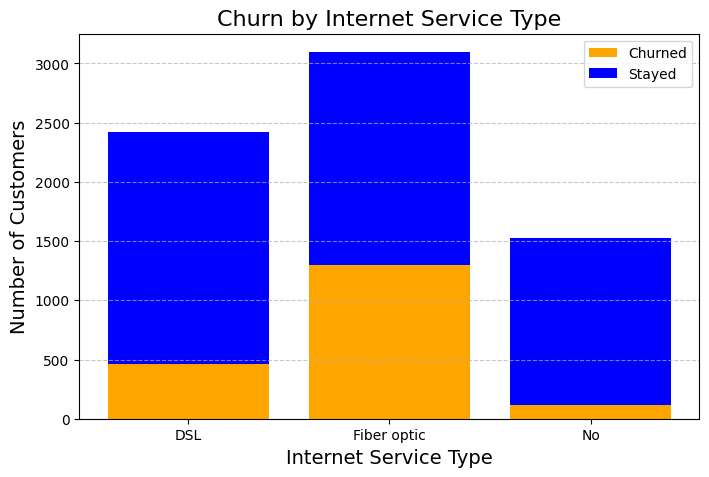

In [15]:
internet_churn = df.groupby('InternetService')['Churn'].value_counts().unstack()
print(internet_churn)
internet_churn_rate = np.round((internet_churn['Yes'] / internet_churn.sum(axis=1)) * 100, 2)
for service in internet_churn_rate.index:
    print(f'Churn Rate for {service} Internet Service: {internet_churn_rate[service]}%')
    
plt.figure(figsize=(8,5))
plt.bar(internet_churn.index, internet_churn['Yes'], color='orange', label='Churned')
plt.bar(internet_churn.index, internet_churn['No'], bottom=internet_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Internet Service Type', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_internet_service.png')

plt.show()

### 7.2 Churn by Internet Service Type

Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818
Churn Rate for Streaming Movies = No: 33.68%
Churn Rate for Streaming Movies = No internet service: 7.4%
Churn Rate for Streaming Movies = Yes: 29.94%


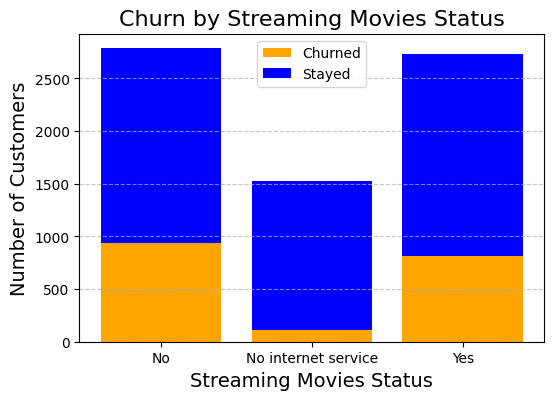

In [17]:
movie_streaming_churn = df.groupby('StreamingMovies')['Churn'].value_counts().unstack()
print(movie_streaming_churn)
movie_streaming_churn_rate = np.round((movie_streaming_churn['Yes'] / movie_streaming_churn.sum(axis=1)) * 100, 2)
for status in movie_streaming_churn_rate.index:
    print(f'Churn Rate for Streaming Movies = {status}: {movie_streaming_churn_rate[status]}%')
    
plt.figure(figsize=(6,4))
plt.bar(movie_streaming_churn.index, movie_streaming_churn['Yes'], color='orange', label='Churned')
plt.bar(movie_streaming_churn.index, movie_streaming_churn['No'], bottom=movie_streaming_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Streaming Movies Status', fontsize=16)
plt.xlabel('Streaming Movies Status', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_streaming_movies.png')

plt.show()

## 8. Streaming Services Analysis

Let's examine how streaming services usage correlates with churn rates.

### 8.1 Churn by Streaming Movies

Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814
Churn Rate for Streaming TV = No: 33.52%
Churn Rate for Streaming TV = No internet service: 7.4%
Churn Rate for Streaming TV = Yes: 30.07%


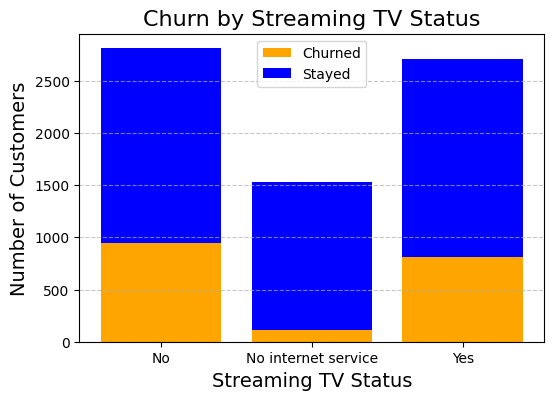

In [18]:
tv_streaming_churn = df.groupby('StreamingTV')['Churn'].value_counts().unstack()
print(tv_streaming_churn)
tv_streaming_churn_rate = np.round((tv_streaming_churn['Yes'] / tv_streaming_churn.sum(axis=1)) * 100, 2)
for status in tv_streaming_churn_rate.index:
    print(f'Churn Rate for Streaming TV = {status}: {tv_streaming_churn_rate[status]}%')
    
plt.figure(figsize=(6,4))
plt.bar(tv_streaming_churn.index, tv_streaming_churn['Yes'], color='orange', label='Churned')
plt.bar(tv_streaming_churn.index, tv_streaming_churn['No'], bottom=tv_streaming_churn['Yes'], color='blue', label='Stayed')
plt.title('Churn by Streaming TV Status', fontsize=16)
plt.xlabel('Streaming TV Status', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
savefig('churn_by_streaming_tv.png')

plt.show()

### 8.2 Churn by Streaming TV

## 9. Key Findings and Conclusions

Based on our comprehensive analysis of the telecommunications customer churn data, we can summarize the following key insights:

### Key Churn Drivers:

1. **Contract Type**: Month-to-month contracts show significantly higher churn rates compared to longer-term contracts
2. **Payment Method**: Electronic check users tend to have higher churn rates
3. **Monthly Charges**: Higher charge tiers correlate with increased churn risk
4. **Internet Service**: Fiber optic customers show different churn patterns compared to DSL users
5. **Demographics**: Senior citizens, customers without partners, and those without dependents show higher churn propensity

### Business Recommendations:

1. **Encourage longer-term contracts** with incentives to reduce month-to-month churn
2. **Promote automatic payment methods** to improve customer retention
3. **Review pricing strategy** for high-charge customers to balance revenue and retention
4. **Targeted retention programs** for high-risk demographic segments
5. **Service quality improvements** for fiber optic customers

### Technical Notes:

- All visualizations are automatically saved to the `figures/` directory
- Charts use consistent orange/blue color scheme for churned/retained customers
- Percentage calculations rounded to 2 decimal places for readability

---

**Analysis completed using pandas, numpy, and matplotlib**